# Einführung Statistiklabor

# Beispielaufgabe 1 - Schulnoten

Lesen Sie die txt-Datei mit den Schulnoten ein und lassen Sie sich diese als Pandas-Dataframework ausgeben.
Anschließend sollen die **Häufigkeiten der erreichten Noten mithilfe eines Säulendiagramms** dargestellt sowie der *Mittelwert*, die *Standardabweichung*, die *Varianz* und der *Median* sowie die *Spannweite* ausgegeben werden. 

Die Formel für den Mittelwert zum Beispiel lautet:
$$\bar x = \frac{1}{n}\sum_{i=1}^{n} x_i$$

## 1. Einlesen der Datei

In [29]:
import pandas as pd #Bibliothek pandas zum erstellen von Dataframeworks (zur weiteren Verarbeitung)

data = pd.read_csv('~/Python/Statistics/datasets/einf_b1.txt', # r für Rohstring, damit '\' als Zeichen anerkannt wird
                     sep=' ',        # Separator im txt-file
                     na_values='.',  # NA (not a number) --> fehlende Werte, gibt es in diesem Dokument eigt keine
                     header=None,    # gibt keine Überschriften im File, erste Zeile = erster Wert
                     decimal=',',    # im File sind Dezimalstellen über Komma getrennt, Python braucht Punkte
                     names=['Nr.','Punkte', 'Note']) # neue Spaltenüberschriften werden vergeben

pd.set_option('display.max_rows',None) # zeigt immer alle eingelesenen Daten
data                                   # zeigt das komplette Dataframework / die Tabelle
#data.head(5)                          # zeigt nur die ersten 5 Einträge 
#data.at[1,'Punkte'] #=90              # Zugriff auf den Wert in der zweiten Zeile (index=1) und zweiten Spalte ('Punkte')

,Nr.,Punkte,Note
0,01,110,1.0
1,02,90,1.7
2,03,108,1.0
3,04,95,1.3
4,05,80,2.3
5,06,74,2.7
6,07,52,3.7
7,08,78,2.3
8,09,39,4.7
9,10,102,1.0


## 2. Daten bereinigen
In der 11. Zeile (index = 10) scheinen ungültige Daten vorzuliegen. Diese sollen aus dem Datensatz (mit `dataframe.drop()`) gelöscht werden.

In [30]:
data = data.drop([10], axis = 0)    # axis = gibt an, ob Zeile (=0) oder Spalte (=1) gelöscht wird 
data = data.reset_index()           # index zurücksetzen, allerdings wird alter Index noch angezeigt
data = data.drop('index', axis = 1) # Spalte mit altem Index löschen


data

,Nr.,Punkte,Note
0,01,110,1.0
1,02,90,1.7
2,03,108,1.0
3,04,95,1.3
4,05,80,2.3
5,06,74,2.7
6,07,52,3.7
7,08,78,2.3
8,09,39,4.7
9,10,102,1.0


## 3. Säulendiagramm der Häufigkeiten erstellen

### 3.1 Schulnoten-"klassen" einführen
Jede Dezimalnote kann einer eindeutigen Schulnotenklasse wie *sehr gut*, *gut*, ... und *ungenügend* zugeordnet werden. 
Die Trennung erfolgt immer bei $x,3$. Sodass z.B. 2,3 noch zur Gruppe gut gehört. **Aber:** Ab 4,0 ist die Zuordnung allgemein ungenügend.

In [31]:
notenGrenzen = [0, 1.3, 2.3, 3.3, 4.0, 6.0]   
# - immer eine Klasse weniger als eine Grenze (0,1.3] -> halboffenes Intervall einschließlich 1.3
notenKlassen = ['sehr gut', 'gut', 'befriedigend', 'ausreichend', 'ungenügend']

# die neuen Klassen den jeweiligen Schulnoten zuordnen und dem Dataframe hinzufügen
neue_noten = pd.cut(data['Note'], notenGrenzen, labels=notenKlassen) 
data['Schulnoten'] = neue_noten # Dataframe kann durch Bezeichnung einer neuen Spalte erweitert werden

data.head(10)

,Nr.,Punkte,Note,Schulnoten
0,01,110,1.0,sehr gut
1,02,90,1.7,gut
2,03,108,1.0,sehr gut
3,04,95,1.3,sehr gut
4,05,80,2.3,gut
5,06,74,2.7,befriedigend
6,07,52,3.7,ausreichend
7,08,78,2.3,gut
8,09,39,4.7,ungenügend
9,10,102,1.0,sehr gut


#### 3.1.1 Zusatz: Daten filtern
Hier werden zwei Ansätze vorgestellt, um ein neues Dataframe mit nur bestimmten Zeilen aus dem alten Datensatz zu erzeugen.
1. Daten über den Zeilenindex filtern und in einem neuen Dataframe ablegen.
2. Daten über Spaltenwerte/-eigenschaften filtern und abspeichern.

In [32]:
# zu 1. über for-Schleife mit Index-array
index = [3,5,7,9,27] # Liste mit Indices die herausgefiltert werden sollen 
new_data = pd.DataFrame() # ein leeres Dataframe anlegen, in dem die entsprechenden Datenzeilen abgespeichert werden sollen

# mithilfe der for-Schleife über Liste mit Indices iterieren
for i in index:
    new_data = pd.concat([new_data, data.loc[i].to_frame().T],axis=0) # über pd.concat() Dataframes aneinanderhängen
    # pd.concat([Dataframes die zusammengefügt werden], axis=0(Zeilenweise anhängen))
    # data.loc[index] erzeugt pandas.Series mit Werten der entsprechenden Zeile
    # pd.Series.to_frame() --> wandet Series in Dataframe um
    # pd.Dataframe().T --> transponiert Dataframe
new_data

,Nr.,Punkte,Note,Schulnoten
3,04,95,1.3,sehr gut
5,06,74,2.7,befriedigend
7,08,78,2.3,gut
9,10,102,1.0,sehr gut
27,28,75,2.7,befriedigend


In [33]:
# zu 2. über boolean masking
mask = data['Note'] >= 2.7 # neue Serie mit bool-Werten für Noten schlechter 2.3
data[mask] # mithilfe bool-Serie kann Dataframe schnell gefiltert werden (nur Zeilen mit True-Maske werden angezeigt)
#data[mask & (data['Note']<=4.0)] # über &-Operator können zwei  

#grade_3 = data[data['Schulnoten']=='befriedigend'] # funktioniert auch mit strings
#grade_3

,Nr.,Punkte,Note,Schulnoten
5,06,74,2.7,befriedigend
6,07,52,3.7,ausreichend
8,09,39,4.7,ungenügend
12,13,58,3.3,befriedigend
14,15,49,4.0,ausreichend
18,19,61,3.3,befriedigend
27,28,75,2.7,befriedigend
29,30,66,3.0,befriedigend
32,33,64,3.0,befriedigend
34,35,72,2.7,befriedigend


### 3.2 Häufigkeiten bestimmen
Mithilfe der Pandas-Funktion `value_counts()` kann ganz leicht die absolute Häufigkeit der jeweiligen Note $H_n(Note)$ bestimmt werden.

*z.B.: $H_n(gut) = 20$*

In [34]:
data_hf = pd.value_counts(data['Schulnoten'], sort=False).rename_axis('Schulnoten').reset_index(name='Häufigkeit')
            #value_counts(zu zählende Daten , ob Daten nach Häufigkeit sortiert werden sollen) 
                                                       ##.rename_axis() ('Spalten-')Bezeichnung der gezählten Eigenschaften
                                                       ##.reset_index() Anzahl der Eigenschaften(name=Spaltenbeschriftung)

data_hf

/tmp/ipykernel_10001/3060849435.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  data_hf = pd.value_counts(data['Schulnoten'], sort=False).rename_axis('Schulnoten').reset_index(name='Häufigkeit')


,Schulnoten,Häufigkeit
0,sehr gut,10
1,gut,20
2,befriedigend,9
3,ausreichend,2
4,ungenügend,1


#### Die relative Häufigkeit
$h_n = \frac{H_n(Note)}{n}$

In [35]:
n = data_hf['Häufigkeit'].sum() # Über.sum-Methode die Grundgesamtheit 'n' bestimmen

*optionaler Zusatz: Die Summen der Spalten in neuer Zeile mit ausgeben lassen:*

In [36]:
# die Summen der Häufigkeit mit Ausgeben lassen --> neue Zeile wird automatisch erstellt, da erstmals referenziert wird
data_hf.loc['Summe']=data_hf['Häufigkeit'].sum() # über .loc[] können ganze Spalten oder Zeilen addressiert werden
data_hf

,Schulnoten,Häufigkeit
0,sehr gut,10
1,gut,20
2,befriedigend,9
3,ausreichend,2
4,ungenügend,1
Summe,42,42


Relative Häufigkeit in Prozent [%] bestimmen (vgl. obere Formel)

In [37]:
data_hf['rel. Häufigkeit in %'] = (data_hf['Häufigkeit'] / n * 100).round(2) # neue Spalte für h_n wird durch Nennung angelegt
data_hf

,Schulnoten,Häufigkeit,rel. Häufigkeit in %
0,sehr gut,10,23.81
1,gut,20,47.62
2,befriedigend,9,21.43
3,ausreichend,2,4.76
4,ungenügend,1,2.38
Summe,42,42,100.00


### 3.3 Säulendiagramm erstellen

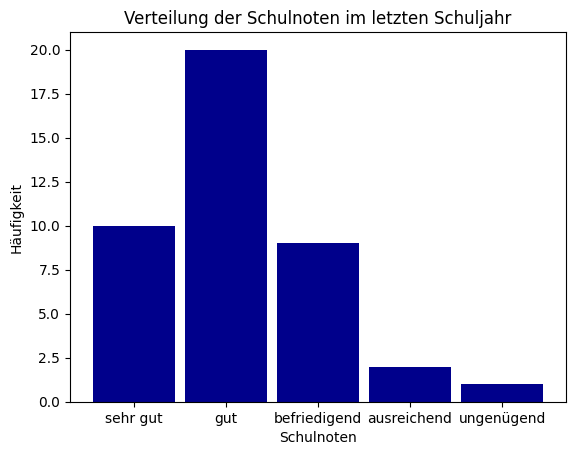

In [38]:
import matplotlib.pyplot as plt

plt.bar(data_hf['Schulnoten'][0:5], data_hf['Häufigkeit'][0:5], #plt.bar(x-Achse, y-Achse, weitere Eigenschaften/Attribute)
        width=0.9, color='darkblue') 

plt.xlabel('Schulnoten')                                        # Beschriftung der x-Achse
plt.ylabel('Häufigkeit')                                        # Beschriftung der y-Achse
plt.title('Verteilung der Schulnoten im letzten Schuljahr')     # Titel oberhalb des Diagramms
plt.show()                                                      # optional in Notebooks: Anzeigen des Diagramms

#### Ergänzung: Zwei Säulendiagramme in einer Figure + Beschriftung der Säulen hinzufügen
(am Beispiel der relativen Häufigkeit)

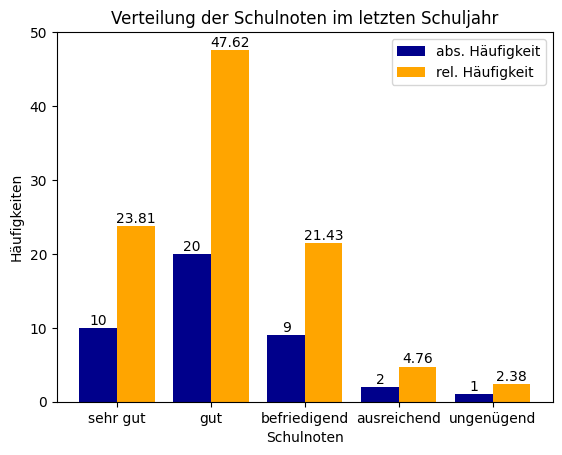

In [39]:
import numpy as np # mithilfe von numpy können unter anderem arrays erzeugt werden

fig, ax = plt.subplots()

xAxis = np.arange(len(data_hf['Schulnoten'][0:5])) # es wird ein numpy-Array erzeugt

plt.bar(xAxis - 0.2, data_hf['Häufigkeit'][0:5], width=0.4, color='darkblue', label='abs. Häufigkeit')
plt.bar(xAxis + 0.2, data_hf['rel. Häufigkeit in %'][0:5], width=0.4, color='orange', label='rel. Häufigkeit')

plt.xticks(xAxis, data_hf['Schulnoten'][0:5])
plt.xlabel('Schulnoten')
plt.ylabel('Häufigkeiten')
plt.title('Verteilung der Schulnoten im letzten Schuljahr')
plt.legend()

# Beschriftung der einzelnen Säulen hinzufügen
for bar in ax.patches:
    bar_height = bar.get_height()
    ax.annotate(text = bar_height,
                xy = (bar.get_x() + bar.get_width() / 2, bar_height+1),
                ha='center', va='center'
                )

## 4. Statistische Angaben ausgeben
Für Mittelwert, Standardabweichung, Varianz und Median können vorgefertigte Methoden aufgerufen werden.<br>
Die Spannweite wird bestimmt, indem der kleinste Wert vom größten abgezogen wird. Zur Bestimmung dieser beiden Werte können auch wieder vorgefertigte Methoden verwendet werden.

Die tabellarische Ausgabe erfolgt hier beispielhaft über ein Dataframe mit einem dictionaire `kennzahlen`.

In [40]:
# dict anlegen mit den Kennzahlen für die erreichten Punkte und entsprechenden Noten
kennzahlen = {'Punkte': [data['Punkte'].mean(), 
                         data['Punkte'].var(), 
                         data['Punkte'].std(), 
                         data['Punkte'].median(), 
                         data['Punkte'].max() - data['Punkte'].min()],
              'Noten': [data['Note'].mean(), 
                        data['Note'].var(), 
                        data['Note'].std(), 
                        data['Note'].median(), 
                        data['Note'].max() - data['Note'].min()]
             }

# Umwandlung dict in pd-Dataframe mit neuer Zeilen-Indexierung (statt vorheriger Durchnummerierung)
key_frame = pd.DataFrame(kennzahlen, index = ['Mittelwert', 'emp. Varianz', 'emp. Std.-Abw.', 'emp. Median', 'Spannweite'])
key_frame.round(4)

,Punkte,Noten
Mittelwert,82.2381,2.1500
emp. Varianz,250.2834,0.7196
emp. Std.-Abw.,15.8203,0.8483
emp. Median,83.5000,2.0000
Spannweite,71.0000,3.7000
